In [1]:
%run '000_shared_lib.ipynb'

In [2]:
import sys
import PIL as pil

"---Image Stats---\n Shape: (700, 525) \n Type: <class 'numpy.ndarray'> \n Mean: 0.5419929876953448 \n Median: 0.5253035294117647 \n Max: 1.0 \n Min: 0.0 "

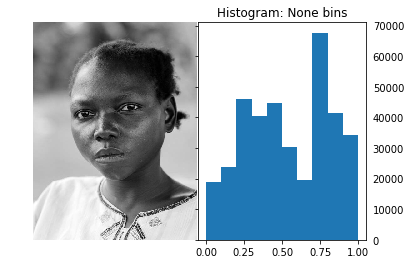

In [3]:
filename = 'media/img3.jpeg'
img = AnImage(filename)
img.stats
img.show()

In [4]:
def make_art_pixel(img, ck=0, seed=4):
    rander = np.random.RandomState(seed)
    rshift = 3
    w, h = np.array(img.shape)*1
    w, h = int(w), int(h)
    #w, h = 600, 450
    print(w, " x ", h)
    
    outsie = np.ones((h, w, 3))*128
    for y in range(1, h):
        outsie[y, 0] = outsie[y-1, 0] + rander.randint(-rshift, rshift+1, size=3)
        
    for x in range(1, w):
        for y in range(1, h-1):
            outsie[y,x] = ((outsie[y-1, x-1] + outsie[y, x-1] + outsie[y+1, x-1])/3) + rander.randint(-rshift, rshift+1, size=3)
    
    imgout = pil.Image.fromarray(outsie.astype(np.uint8)).convert('RGBA')
    
    img3 = img.T*outsie[:,:,ck]*100
    
    show_image_list([outsie[:,:,ck], imgout, img3], titlez=['outsie', 'imgout', 'mash'], nc=3)

700  x  525


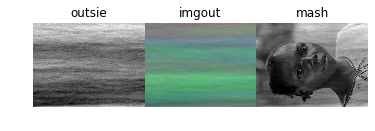

700  x  525


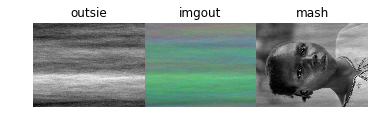

700  x  525


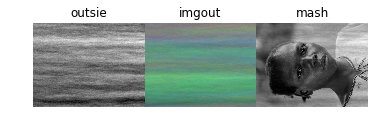

In [5]:
make_art_pixel(img.img)
plt.clf()
make_art_pixel(img.img, ck=1)
plt.clf()
make_art_pixel(img.img, ck=2)
plt.show();

In [11]:
# https://alpynepyano.github.io/healthyNumerics/posts/decorative-mathematical-functions.html 
def make_art_ft(img, res, k, case):
    w, h = img.shape
    
    def ft(t, k): ##
        def P(z): return 1 - z/2 - 1/z**3 / 3j
        return np.exp(1j*t) * P(np.exp(k*1j*t) )
    
    t = np.linspace(2, 2*np.pi, res*k+1)
    u = ft(t, k)

    ## plot it
    fig, ax = plt.subplots(figsize=(20,14), facecolor='w')

    if case =='A':
        vx1, vy1 = np.real(u), np.imag(u)
        ax.plot(vx1, vy1, lw=1, ls='-', color='m', alpha=0.9)
        #ax.fill_between(vx1, vy1, alpha=0.5)

    if case == 'B':
        vx1, vy1 = np.real(u)+t, np.imag(u)+0.1*t
        ax.plot(vx1, vy1, lw=2.5, ls='-', color='lime', alpha=0.95)
        
    if case == 'C':
        vx1, vy1 = np.real(u)+t, np.imag(u)+0.1*t
        vx2, vy2 = np.real(u)+t, np.imag(u)+0.0*t
        ax.plot(vx1, vy1, lw=2.5, ls='-', color='k', alpha=0.75)
        ax.plot(vx2, vy2, lw=2.5, ls='-', color='k', alpha=0.75)
        ax.fill_between(vy1, vx2, vy2, alpha=0.5)
        
    if case == 'C2':
        vx1, vy1 = np.real(u)+t, np.imag(u)+0.1*t
        vx2, vy2 = np.real(u)+t, np.imag(u)+0.0*t 
        ax.fill_between(vy1, vx2, vy2, alpha=0.5)
        ax.fill_between(vx1, vy1, vy2, alpha=0.5)
        ax.fill_between(vx2, vy1, vx1, alpha=0.5)
         
    if case == 'D': #F
        vx1, vy1 = np.real(u)+t, np.imag(u)
        vx2, vy2 = np.real(u)+t, np.imag(u)+0.3*t 
        ax.scatter(vx1, vy1, s=300, marker='s', color='m', alpha=0.5)
        ax.plot(vx2, vy2, lw=0.5, ls='-', marker='s', color='k', alpha=0.5)
        
        
    ax.set_aspect('equal')
    plt.axis('off')
    plt.show();

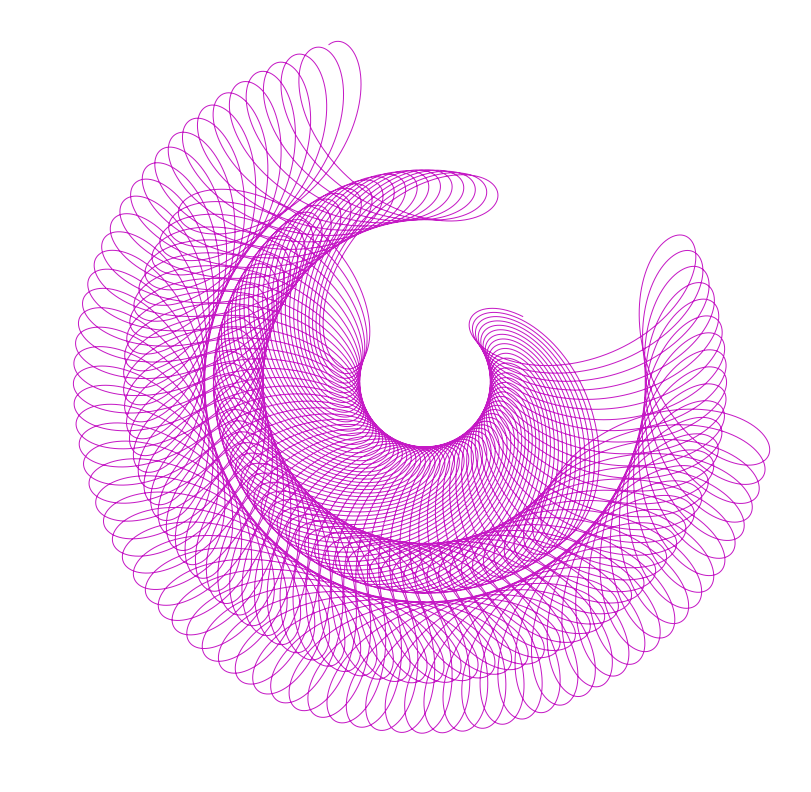

<Figure size 432x288 with 0 Axes>

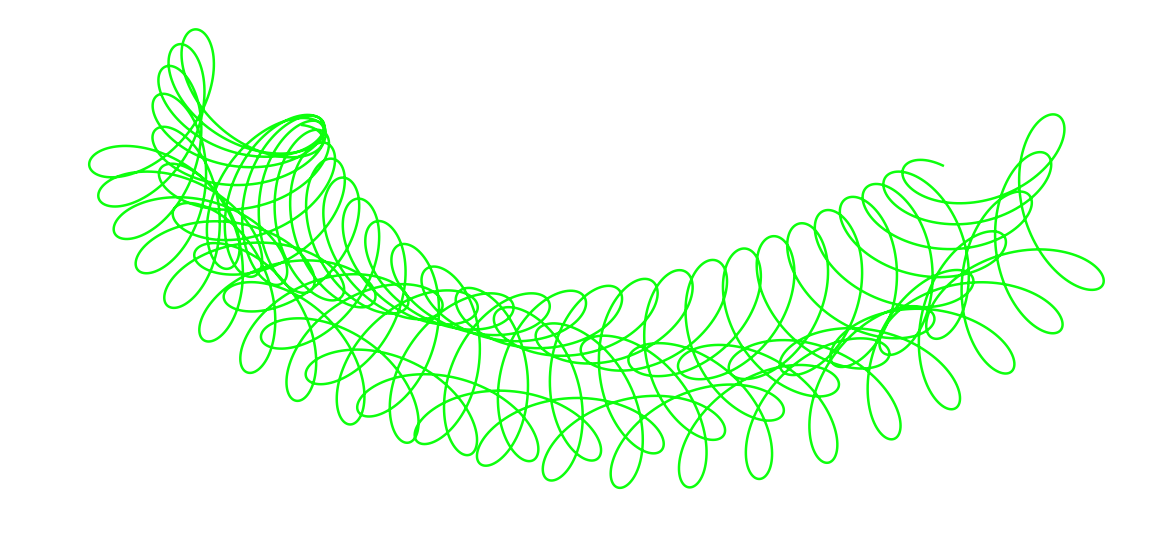

<Figure size 432x288 with 0 Axes>

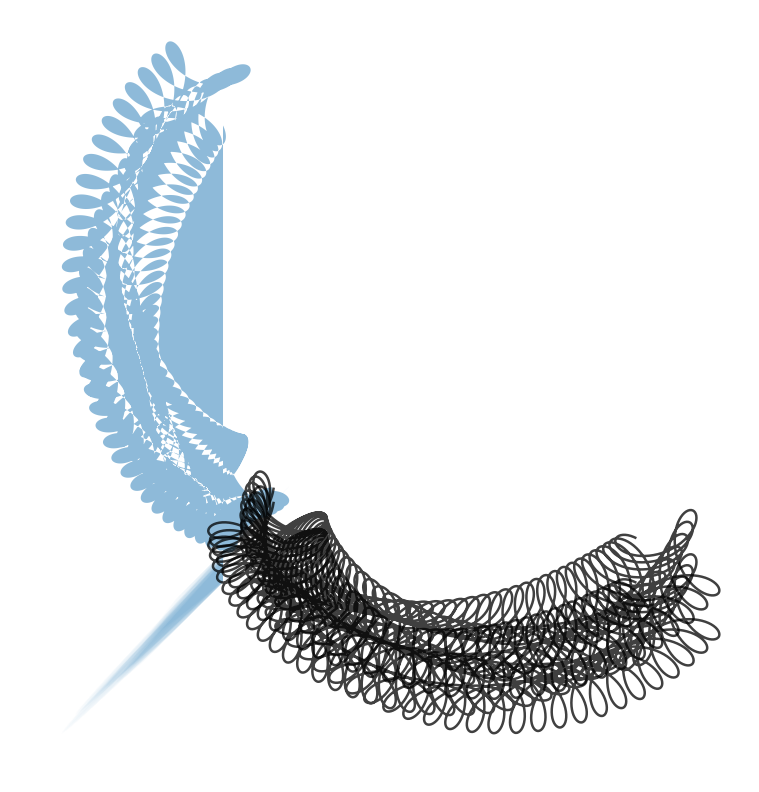

<Figure size 432x288 with 0 Axes>

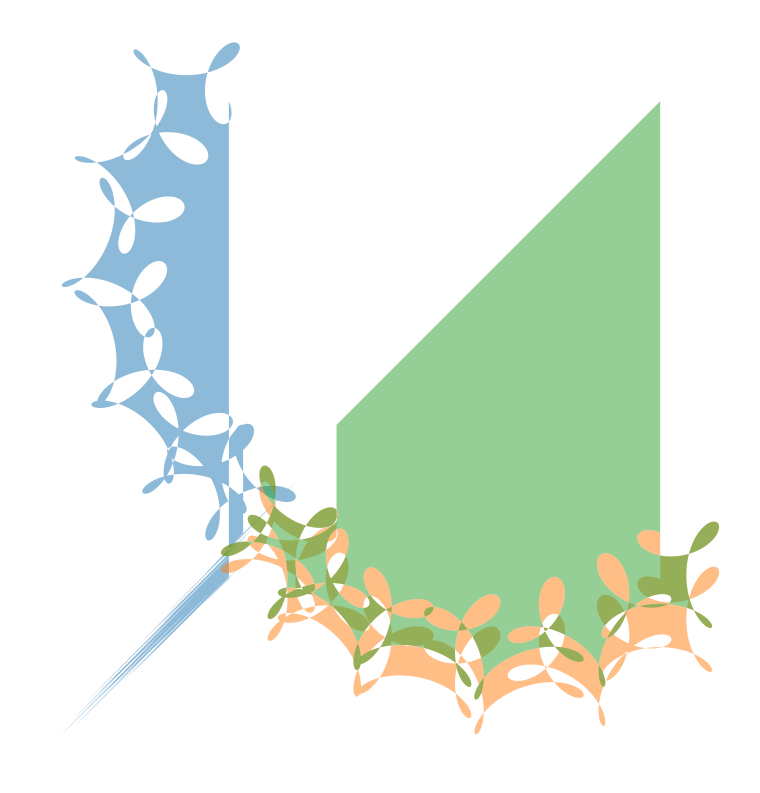

<Figure size 432x288 with 0 Axes>

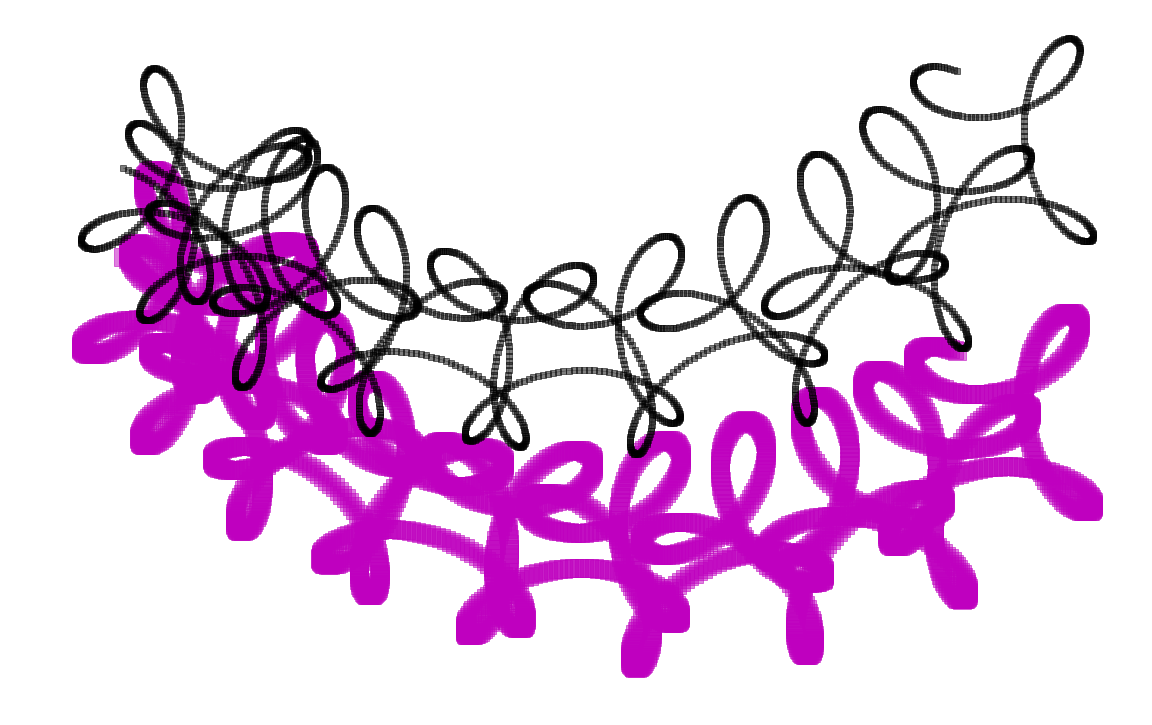

<Figure size 432x288 with 0 Axes>

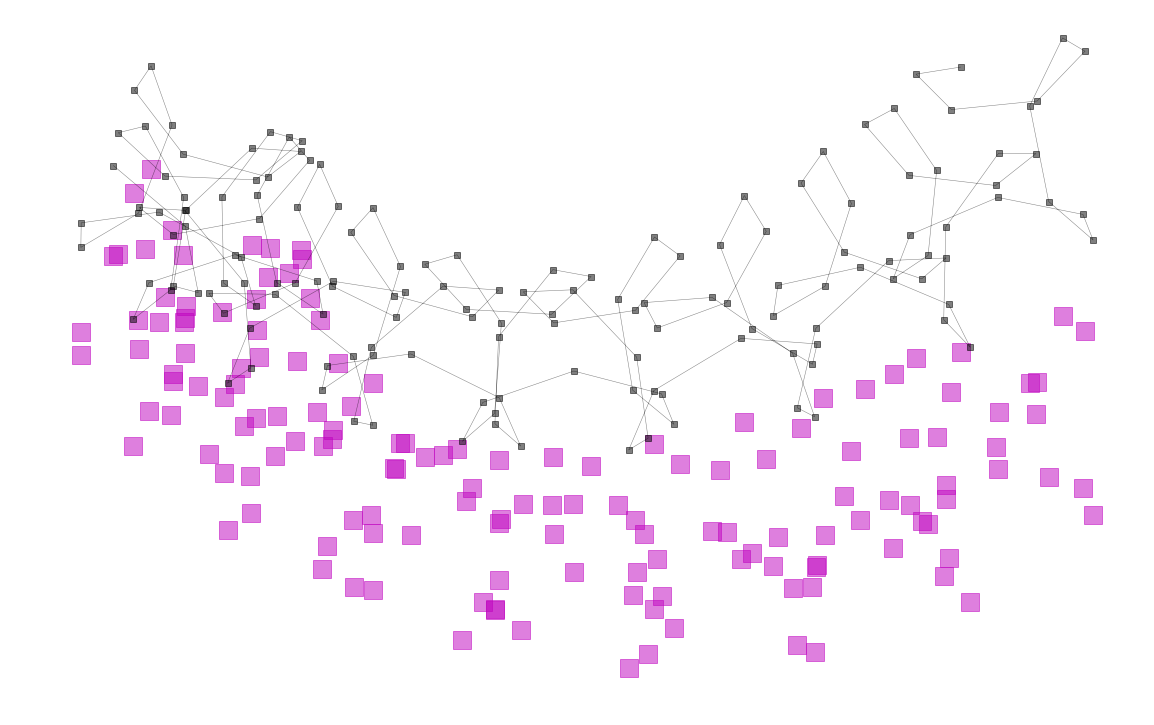

In [15]:
make_art_ft(img.img, 201, 105, 'A');
plt.clf()
make_art_ft(img.img, 201, 35, 'B');
plt.clf()
make_art_ft(img.img, 201, 55, 'C');
plt.clf()
make_art_ft(img.img, 201, 10, 'C2');
plt.clf()
make_art_ft(img.img, 201, 15, 'D');
plt.clf()
make_art_ft(img.img, 10, 15, 'D');
plt.show();

In [16]:
# https://simpleprogrammer.com/python-generative-art-math/
def make_art_receman_seq():
    pass #TODO: turtle

In [40]:
def make_art_bubbles(n=100, j=3):
    rander = np.random.RandomState(j)
    x = rander.rand(n)
    y = rander.rand(n)
    colors = rander.rand(n)
    
    a = (30 * rander.rand(n) )**2
    ax = plt.subplot(111)
    ax.scatter(x,y,s=a, c=colors, alpha=0.6)
    plt.axis('off')
    plt.show();

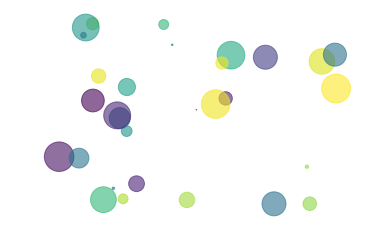

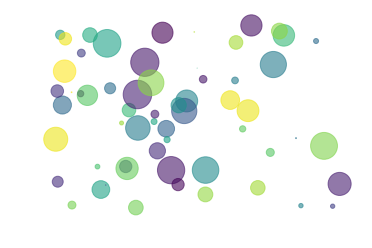

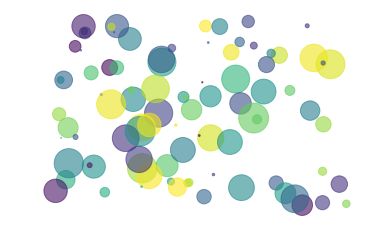

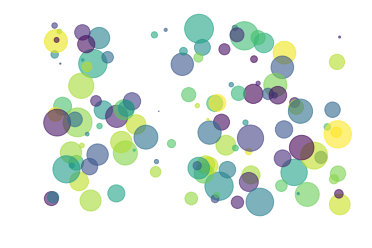

In [55]:
for i in range(4):
    make_art_bubbles(n=30*(i+1),
                 j = np.random.randint(0,100,size=1)[0]);
    


# Artistic Filters

**Basics**
[Neural Style with Pytorch](https://pytorch.org/tutorials/advanced/neural_style_tutorial.html)
- Gist of it: creat a new image $G$ such that $min D(G||F)$ and $min D(G||S)$ where $F$ is the content stats and $S$ is the style stats.


[Using CNN Source](https://towardsdatascience.com/art-with-ai-turning-photographs-into-artwork-with-neural-style-transfer-8144ece44bed)

Image processing Techniques
- **Color quantization:** reduce color space for say cartoonish or paining feel. Different techniques to threshold or group pixels of similar color e.g. K-means clustering 
- **Super pixel segmentation:** a super pixel is a group of connected pixels with similar color or gray levels. TODO: diff with color quantization
- **Style Transfer:** combine an image with the style of another. I.E. combine the content stats of one image with the style stats of another. 
    - Style is defined using edges, color levels - color, texture, stroke patterns, painting style, etc 
    - Image contet of first is defined as object structure, layout and positioning. 
    - DNN approach: 
    - Fourier Transform: TODO: role of FT  @ image structure is in phase information. 
    
    

[Real-time Style Transfer](https://shafeentejani.github.io/2017-01-03/fast-style-transfer/) TODO
Real-time style transfer on ordinary machines
- based on redundancy in perception information. 




[Neural Style Transfer with OpenCV](https://www.pyimagesearch.com/2018/08/27/neural-style-transfer-with-opencv/)
- 
    
  